In [19]:
!pip install pandas-datareader
import pandas as pd
import numpy as np 
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from datetime import datetime
import pandas_datareader.data as web
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

# Importing the Stock Prices

In [20]:
AAPL=pd.read_csv('individual_stocks_5yr/AAPL_data.csv')
GOOG=pd.read_csv('individual_stocks_5yr/GOOG_data.csv')
MSFT=pd.read_csv('individual_stocks_5yr/MSFT_data.csv')
AMZN=pd.read_csv('individual_stocks_5yr/AMZN_data.csv')

# Displaying Apple Stock Data

In [21]:
AAPL.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


# Describing the Data

In [22]:
AAPL.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1259.0,1.090554e+02,3.054922e+01,5.542420e+01,8.464780e+01,108.97,1.273350e+02,1.793700e+02
high,1259.0,1.099511e+02,3.068619e+01,5.708570e+01,8.533495e+01,110.03,1.281000e+02,1.801000e+02
low,1259.0,1.081416e+02,3.037622e+01,5.501420e+01,8.425065e+01,108.05,1.262900e+02,1.782500e+02
close,1259.0,1.090667e+02,3.055681e+01,5.578990e+01,8.483065e+01,109.01,1.271200e+02,1.792600e+02
volume,1259.0,5.404790e+07,3.346835e+07,1.147592e+07,2.969438e+07,45668931.00,6.870872e+07,2.668336e+08


# Information of Data

In [23]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


# Display Historical Stock Price

In [27]:
AAPL['date']=pd.to_datetime(AAPL['date'])
GOOG['date']=pd.to_datetime(AAPL['date'])
MSFT['date']=pd.to_datetime(AAPL['date'])
AMZN['date']=pd.to_datetime(AAPL['date'])
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 1, 11)

dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']

In [29]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 1, 11)
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']

# Historical Closing Price of Apple Stock

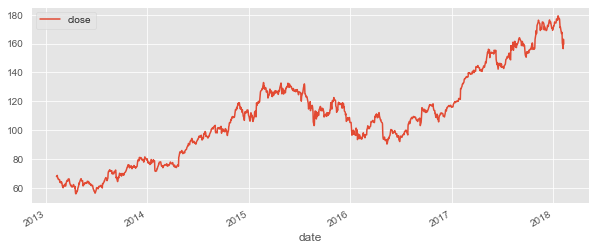

In [30]:
AAPL.plot(x='date', y='close',legend=True,figsize=(10,4))
plt.ioff()

# Volume traded for Apple Stock

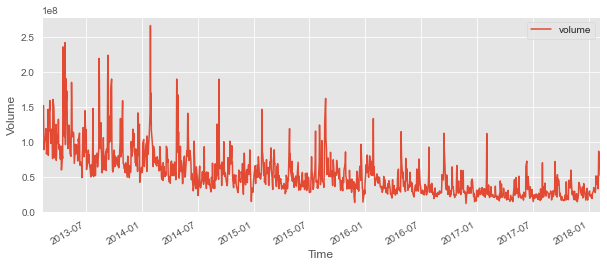

In [31]:
title='VOLUME TRADED'
ylabel='Volume'
xlabel='Time'
ax=AAPL.plot(x='date', y='volume',legend=True,figsize=(10,4));
ax.autoscale(axis='x',tight=True)  # use both if want to scale both axis
ax.set(xlabel=xlabel,ylabel=ylabel)
plt.ioff()

# Moving Average for Apple Stock

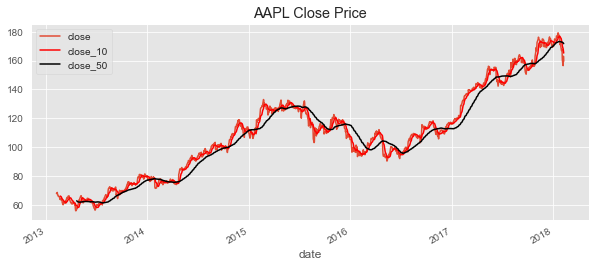

In [32]:
AAPL['close_10']=AAPL['close'].rolling(10).mean()
AAPL['close_50']=AAPL['close'].rolling(50).mean()
ax=AAPL.plot(x='date',y='close',title='AAPL Close Price',figsize=(10,4))
AAPL.plot(x='date',y='close_10',color='red',ax=ax)
AAPL.plot(x='date',y='close_50',color='k',ax=ax)
plt.ioff()

# Daily Returns

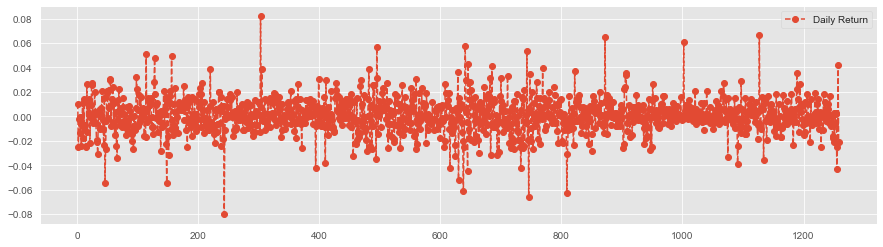

In [33]:
AAPL['Daily Return']=AAPL['close'].pct_change()
AAPL['Daily Return'].plot(figsize=(15,4),legend=True,linestyle='--',marker='o')
plt.ioff()

# Average Daily return

/Users/aishwaryamelige/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


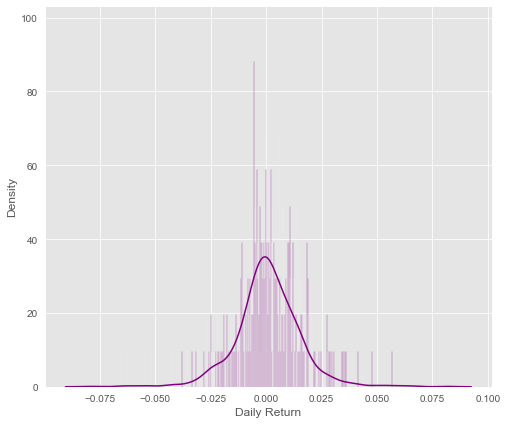

In [34]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=2000,color='purple')
plt.ioff()

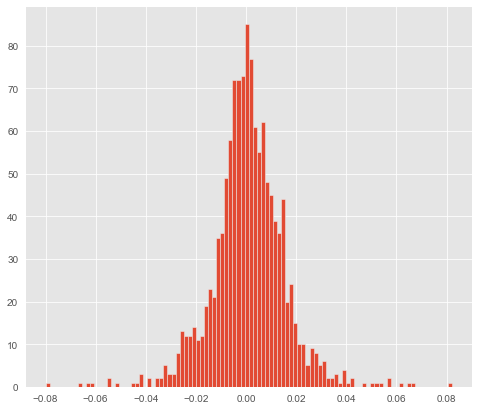

In [35]:
AAPL['Daily Return'].hist(bins=100)
plt.ioff()

# Checking if the Stock Prices of Tech Companies are Correlated

In [37]:
df=AAPL['date'].copy()
df=pd.DataFrame(df)
df['AAPL']=AAPL['close']
df['GOOG']=GOOG['close']
df['MSFT']=MSFT['close']
df['AMZN']=AMZN['close']
df.drop(['date'], axis = 1, inplace = True, errors = 'ignore')
tech_rets=df.pct_change()
tech_rets=pd.DataFrame(tech_rets)
tech_rets['date']=AAPL['date']
tech_rets.shape

(1259, 5)

# Pair Plot

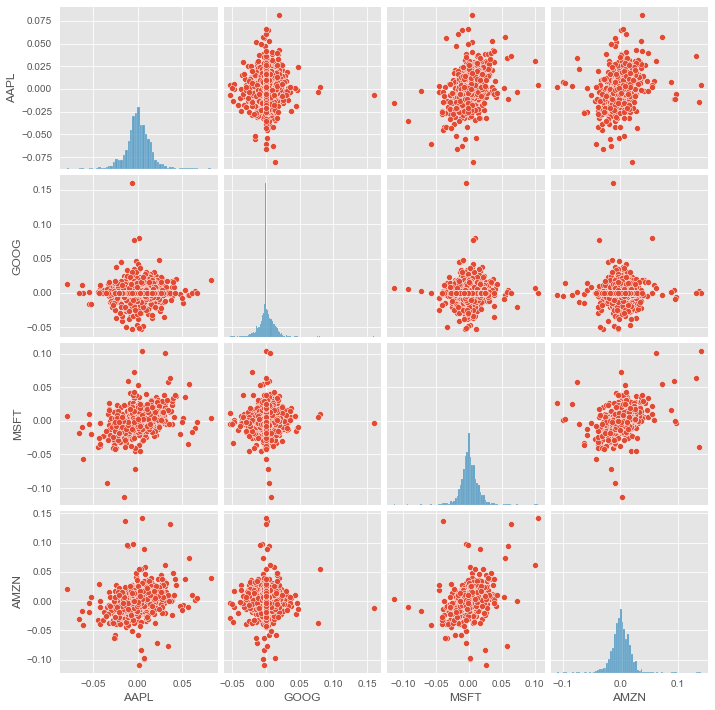

In [38]:
sns.pairplot(tech_rets.dropna())
plt.ioff()

# Forecasting Apple Stock Price

In [43]:
# AAPL.head()
df_prophet=AAPL[['date','close']]
df_prophet=df_prophet.sort_values('date')
df_prophet

,date,close
0,2013-02-08,67.8542
1,2013-02-11,68.5614
2,2013-02-12,66.8428
3,2013-02-13,66.7156
4,2013-02-14,66.6556
...,...,...
1254,2018-02-01,167.7800
1255,2018-02-02,160.5000
1256,2018-02-05,156.4900
1257,2018-02-06,163.0300


# Renaming the column names to fit Prophet Algorithm

In [42]:
df_prophet=df_prophet.rename(columns={'date':'ds','close':'y'})
df_prophet

,ds,y
0,2013-02-08,67.8542
1,2013-02-11,68.5614
2,2013-02-12,66.8428
3,2013-02-13,66.7156
4,2013-02-14,66.6556
...,...,...
1254,2018-02-01,167.7800
1255,2018-02-02,160.5000
1256,2018-02-05,156.4900
1257,2018-02-06,163.0300


# Creating the Prophet Model

In [44]:
import random 
import seaborn as sns
!conda install -c conda-forge fbprophet -y
!pip install --upgrade plotly
from fbprophet import Prophet
m=Prophet()
m.fit(df_prophet)
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)
forecast

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                        -                                                                                                   failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - alabaster -> python[version='2.7.*|3.5.*|3.6.*|>=2.7,<2.8.0a0|>=3.5,<3.6.0a0|>=3.6,<3.7.0a0|3.4.*|>=3.7,<3.8.0a0']
  - anaconda==2021.05 -> python[version='3.7.10|3.9.4|3.8.8',build='h88f2d9e_5|h88f2d9e_0']
  - appdirs -> python[version='2.7.*|3.5.*|3

nbclassic -> python[version='>=3.6'] -> openssl[version='1.0.*|>=1.0.2o,<1.0.3a|>=1.0.2p,<1.0.3a|>=1.1.1a,<1.1.2a|>=1.1.1d,<1.1.2a|>=1.1.1e,<1.1.2a|>=1.1.1g,<1.1.2a|>=1.1.1h,<1.1.2a|>=1.1.1i,<1.1.2a|>=1.1.1j,<1.1.2a|>=1.1.1k,<1.1.2a|>=1.1.1l,<1.1.2a|>=3.0.0,<4.0a0|>=1.1.1f,<1.1.2a|>=1.1.1c,<1.1.2a|>=1.1.1b,<1.1.2a|>=1.0.2n,<1.0.3a|>=1.0.2m,<1.0.3a|>=1.0.2l,<1.0.3a']
patsy -> python[version='>=3.6'] -> openssl[version='1.0.*|>=1.0.2o,<1.0.3a|>=1.0.2p,<1.0.3a|>=1.1.1a,<1.1.2a|>=1.1.1d,<1.1.2a|>=1.1.1e,<1.1.2a|>=1.1.1g,<1.1.2a|>=1.1.1h,<1.1.2a|>=1.1.1i,<1.1.2a|>=1.1.1j,<1.1.2a|>=1.1.1k,<1.1.2a|>=1.1.1l,<1.1.2a|>=3.0.0,<4.0a0|>=1.1.1f,<1.1.2a|>=1.1.1c,<1.1.2a|>=1.1.1b,<1.1.2a|>=1.0.2n,<1.0.3a|>=1.0.2m,<1.0.3a|>=1.0.2l,<1.0.3a']
jupyter_console -> python[version='>=3.6'] -> openssl[version='1.0.*|>=1.0.2o,<1.0.3a|>=1.0.2p,<1.0.3a|>=1.1.1a,<1.1.2a|>=1.1.1d,<1.1.2a|>=1.1.1e,<1.1.2a|>=1.1.1g,<1.1.2a|>=1.1.1h,<1.1.2a|>=1.1.1i,<1.1.2a|>=1.1.1j,<1.1.2a|>=1.1.1k,<1.1.2a|>=1.1.1l,<1.1.2a|>=3.0.0,<4

anaconda==2021.05 -> matplotlib-base==3.3.4=py37h8b3ea08_0 -> freetype[version='>=2.10.4,<3.0a0']
scikit-image -> matplotlib-base[version='>=2.0.0'] -> freetype[version='2.5.*|2.6.*|2.7|2.8.*|2.8.1|2.8.1.*|>=2.10.2,<3.0a0|>=2.10.4,<3.0a0|>=2.9.1,<3.0a0|>=2.11.0,<3.0a0|>=2.3|>=2.8.1,<2.9.0a0|>=2.10.3,<3.0a0|>=2.8,<2.9.0a0|2.7|2.7.*']
matplotlib -> matplotlib-base[version='>=3.5.0,<3.5.1.0a0'] -> freetype[version='>=2.10.2,<3.0a0|>=2.10.4,<3.0a0|>=2.11.0,<3.0a0|>=2.3']
fbprophet -> matplotlib-base[version='>=2.0.0'] -> freetype[version='2.6.*|>=2.10.2,<3.0a0|>=2.10.4,<3.0a0|>=2.9.1,<3.0a0|>=2.11.0,<3.0a0|>=2.3|>=2.8,<2.9.0a0']
matplotlib-base -> freetype[version='>=2.10.2,<3.0a0|>=2.10.4,<3.0a0|>=2.9.1,<3.0a0|>=2.11.0,<3.0a0|>=2.3']
pillow -> freetype[version='2.5.*|2.6.*|2.7|2.7.*|2.7|2.8.*|2.8.1|2.8.1.*|>=2.10.4,<3.0a0|>=2.9.1,<3.0a0|>=2.8.1,<2.9.0a0|>=2.10.3,<3.0a0|>=2.8,<2.9.0a0']
matplotlib -> freetype[version='2.6.*|>=2.9.1,<3.0a0|>=2.8,<2.9.0a0']
matplotlib-base -> pillow[version=

ModuleNotFoundError: No module named 'fbprophet'

# Plotting the Apple Stock Forecast for Period of One years

In [ ]:
figure=m.plot(forecast,xlabel='Date',ylabel='Closing Price')

In [ ]:
figure=m.plot_components(forecast)